In [472]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from IPython.display import display, Math

# **Dane**

In [473]:
cny_df = pd.read_csv(".\\data\\CNYUSD=X.csv")
eur_df = pd.read_csv(".\\data\\EURUSD=X.csv")

In [474]:
print(f'CNY czy NULL:\n{cny_df.isnull().sum()}\n\n')
print(f'EUR czy NULL:\n{eur_df.isnull().sum()}')

CNY czy NULL:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


EUR czy NULL:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [475]:
cny = cny_df["Close"]
eur = eur_df["Close"]

print((cny_df["Date"] == eur_df["Date"]).all()) # upewnienie ze serio biore te same daty
Date = pd.to_datetime(cny_df["Date"])

True


In [476]:
R_CNY = cny.pct_change(fill_method=None)
R_EUR = eur.pct_change(fill_method=None)

In [477]:
print(f'CNY czy NULL:\n{R_CNY.isnull().sum()}\n\n')
print(f'EUR czy NULL:\n{R_EUR.isnull().sum()}')

CNY czy NULL:
1


EUR czy NULL:
1


In [478]:
R_CNY = R_CNY.dropna()
R_EUR = R_EUR.dropna()

Date = Date[1:]

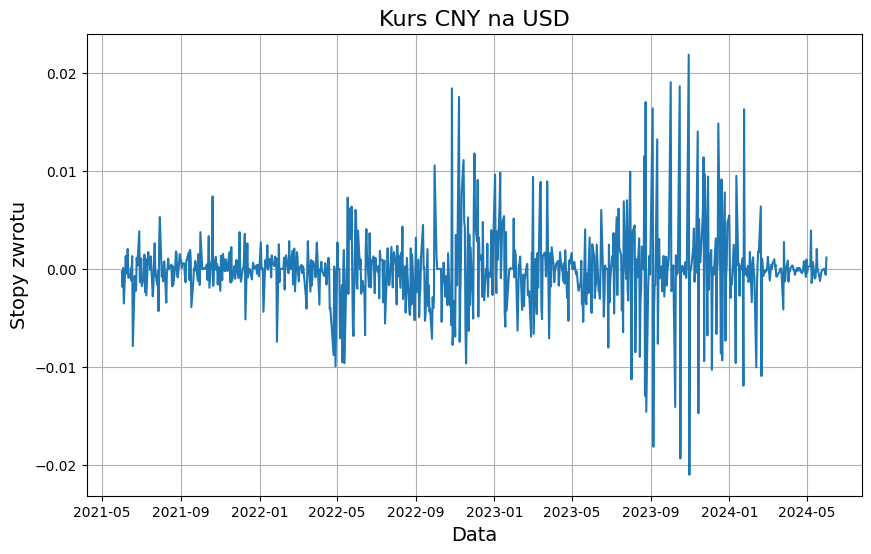

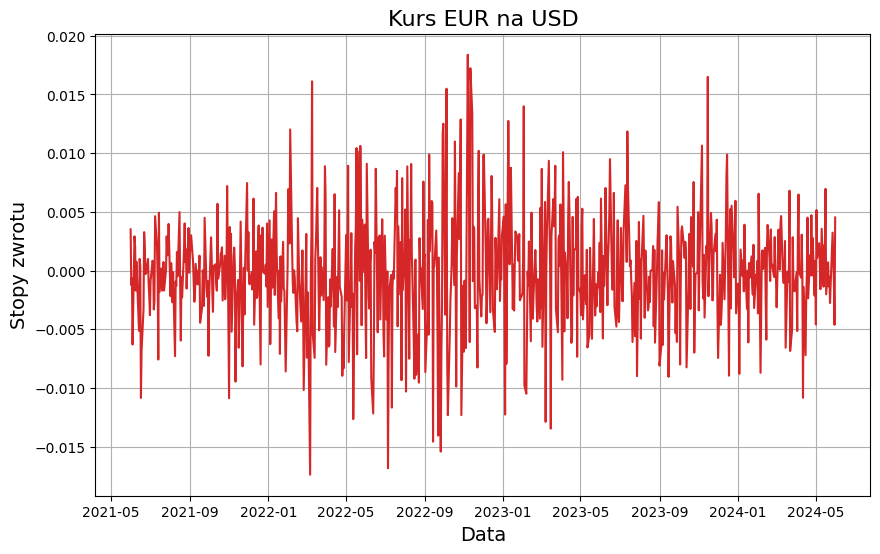

In [479]:
plt.figure(figsize=(10, 6))
plt.plot(Date, R_CNY, c="C0")
plt.title("Kurs CNY na USD", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Stopy zwrotu", fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Date, R_EUR, c="C3")
plt.title("Kurs EUR na USD", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Stopy zwrotu", fontsize=14)
plt.grid(True)
plt.show()

In [480]:
mean_cny = np.mean(R_CNY)
std_cny = np.std(R_CNY)

mean_eur = np.mean(R_EUR)
std_eur = np.std(R_EUR)


df = pd.DataFrame({
    'Nazwa_miary_zmiennosci': ['Średnia', 'Odchylenie standardowe'],
    'CNY': [
        mean_cny,
        std_cny
  
    ],

    'EUR': [
        mean_eur,
        std_eur
    ]
})

df

,Nazwa_miary_zmiennosci,CNY,EUR
0,Średnia,-0.000156,-0.000137
1,Odchylenie standardowe,0.004085,0.004861


In [481]:
pearson_corr, _ = stats.pearsonr(R_CNY, R_EUR)
spearman_corr, _ = stats.spearmanr(R_CNY, R_EUR)

corr = pd.DataFrame({
    'Korelacja': ['Pearsona', 'Spearmana'], # do dalszych obliczen bralam pearsona
    'Wynik': [pearson_corr, spearman_corr]
})

corr

,Korelacja,Wynik
0,Pearsona,0.296987
1,Spearmana,0.317270


# **OBLICZENIE $E(R_{p})$ i $\sigma_{p}$**

In [482]:
def calculate_E_sigma(w_a, w_b, mean_a=mean_cny, mean_b=mean_eur, std_a =std_cny, std_b=std_eur, corr=pearson_corr):
    E_R_p = []
    sigma_p = []
    labels = []
    # strokes = []

    for i in range(len(w_a)):
        E_R_p_i = w_a[i]*mean_a + w_b[i]*mean_b
        E_R_p.append(E_R_p_i)

        sigma_p_i = np.sqrt(((w_a[i]**2) * (std_a**2)) + ((w_b[i]**2) * (std_b**2)) + 2*w_a[i]*w_b[i]*std_a*std_b*corr)
        sigma_p.append(sigma_p_i)

        label = str(round(w_a[i], 3)) + '$\\cdot R_{CNY}$' + ' + ' + str(round(w_b[i], 3)) + '$\\cdot R_{EUR}$'
        labels.append(label)

        # strokes_i = (w_a*)

    # return np.multiply(-1, E_R_p), sigma_p, labels # jak mnozymy razy -1
    return E_R_p, sigma_p, labels # jak zostawiamy ujemne

In [483]:
weights_cny = np.arange(0, 1.005, 0.005)
weights_eur = weights_cny[::-1]

In [484]:
E_R_line, sigma_line, labels_line = calculate_E_sigma(weights_cny, weights_eur)

# **a) Portfel rzeczywisty**

In [485]:
cny_percent = 17.8
eur_percent = 20.3

all_percent = cny_percent + eur_percent

cny_real_w = cny_percent/all_percent
eur_real_w = eur_percent/all_percent

print(f'Waga CNY: {cny_real_w}\n\nWaga EUR: {eur_real_w}')

Waga CNY: 0.4671916010498688

Waga EUR: 0.5328083989501312


In [486]:
real_portfolio = np.multiply(cny_real_w, R_CNY) + np.multiply(eur_real_w, R_EUR)

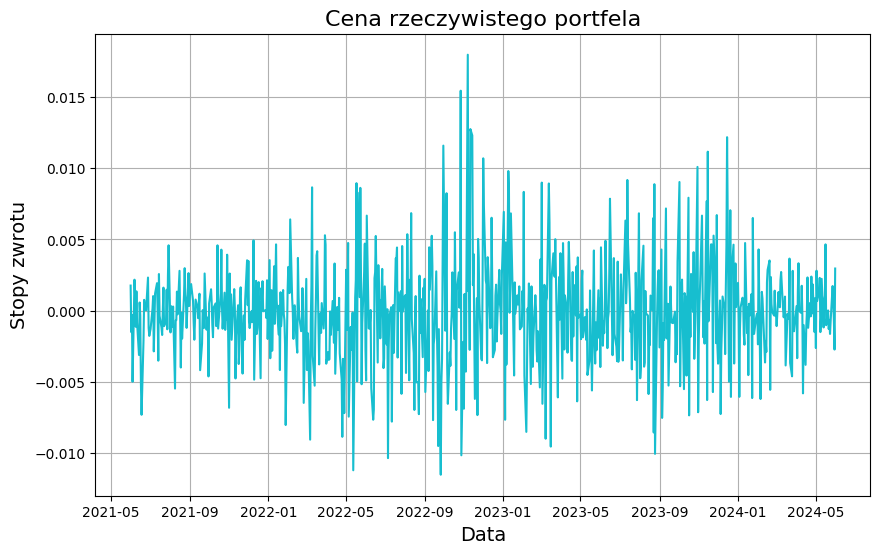

In [487]:
plt.figure(figsize=(10, 6))
plt.plot(Date, real_portfolio, c="C9")
plt.title("Cena rzeczywistego portfela", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Stopy zwrotu", fontsize=14)
plt.grid(True)
plt.show()

In [488]:
E_R_p_real, sigma_p_real, real_label = calculate_E_sigma(np.array([cny_real_w]), np.array([eur_real_w]))

E_R_p_real = E_R_p_real[0]
sigma_p_real = sigma_p_real[0]
real_label = real_label[0]

In [489]:
display(Math(r'E(R_{p}) = ' + str(E_R_p_real)))
display(Math(r'\sigma_{p} = ' + str(sigma_p_real)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

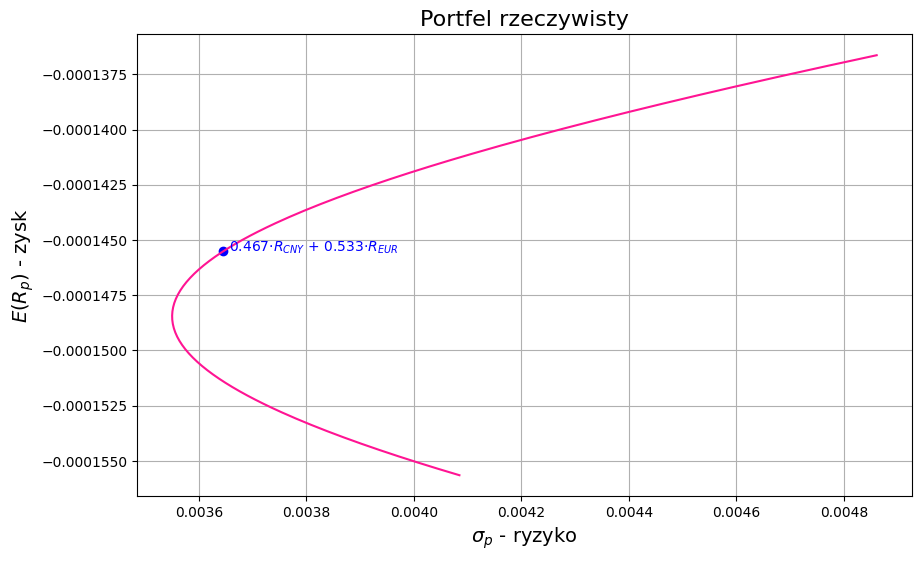

In [490]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_line, E_R_line, c='deeppink')
plt.scatter(sigma_p_real, E_R_p_real, c='b')
plt.title("Portfel rzeczywisty", fontsize=16)
plt.ylabel("$E(R_{p})$ - zysk", fontsize=14)
plt.xlabel("$\sigma_{p}$ - ryzyko", fontsize=14)
plt.grid(True)
plt.annotate(real_label, (sigma_p_real, E_R_p_real), textcoords="offset points", xytext=(65,0), ha='center', fontsize=10, color='b')
plt.show()

# **b) Portfel z proponowanymi wagami**

In [491]:
# wymyślone wagi
cny_w = np.array([0.05, 0.25, 0.4, 0.5, 0.6, 0.75, 0.95])
eur_w = np.array([0.95, 0.75, 0.6, 0.5, 0.4, 0.25, 0.05])

In [492]:
E_R_p, sigma_p, labels = calculate_E_sigma(cny_w, eur_w)

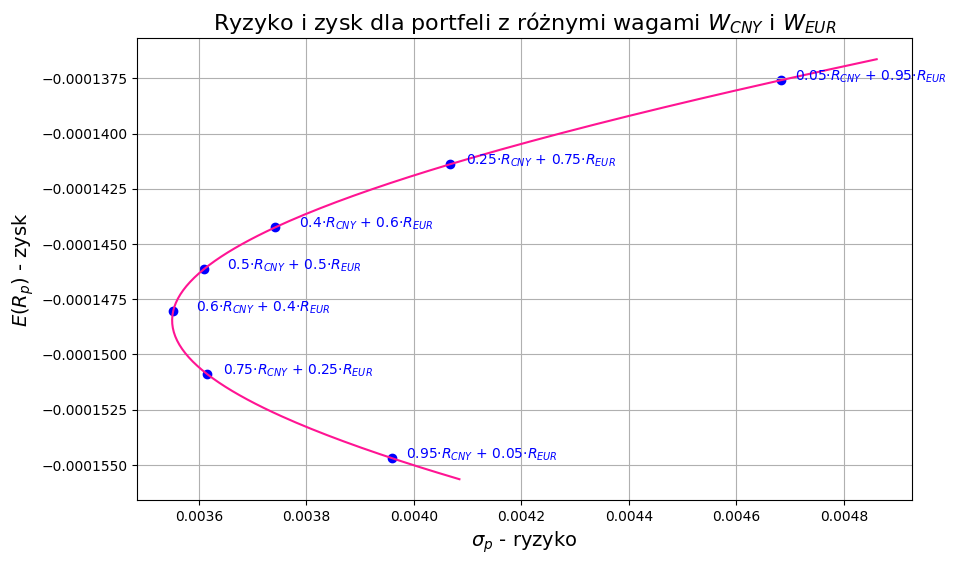

In [493]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_line, E_R_line, c='deeppink')
plt.scatter(sigma_p, E_R_p, c='b')
plt.title("Ryzyko i zysk dla portfeli z różnymi wagami $W_{CNY}$ i $W_{EUR}$", fontsize=16)
plt.ylabel("$E(R_{p})$ - zysk", fontsize=14)
plt.xlabel("$\sigma_{p}$ - ryzyko", fontsize=14)
plt.grid(True)

for i, label in enumerate(labels):
    plt.annotate(label, (sigma_p[i], E_R_p[i]), textcoords="offset points", xytext=(65,0), ha='center', fontsize=10, color='b')

plt.show()

# **c) Portfel o minimalnym ryzyku**

In [494]:
w_a = ((std_eur**2) - std_cny*std_eur*pearson_corr)/((std_eur**2) + (std_cny**2) - 2*std_cny*std_eur*pearson_corr)
w_b = 1 - w_a

In [495]:
print(f'w_a = {w_a}\nw_b = {w_b}')

w_a = 0.6217381204731397
w_b = 0.3782618795268603


In [496]:
min_E_R_p, min_sigma_p, min_label = calculate_E_sigma(np.array([w_a]), np.array([w_b]))

min_E_R_p = min_E_R_p[0]
min_sigma_p = min_sigma_p[0]
min_label = min_label[0]

In [497]:
display(Math(r'E(R_{p}) = ' + str(min_E_R_p)))
display(Math(r'\sigma_{p} = ' + str(min_sigma_p)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

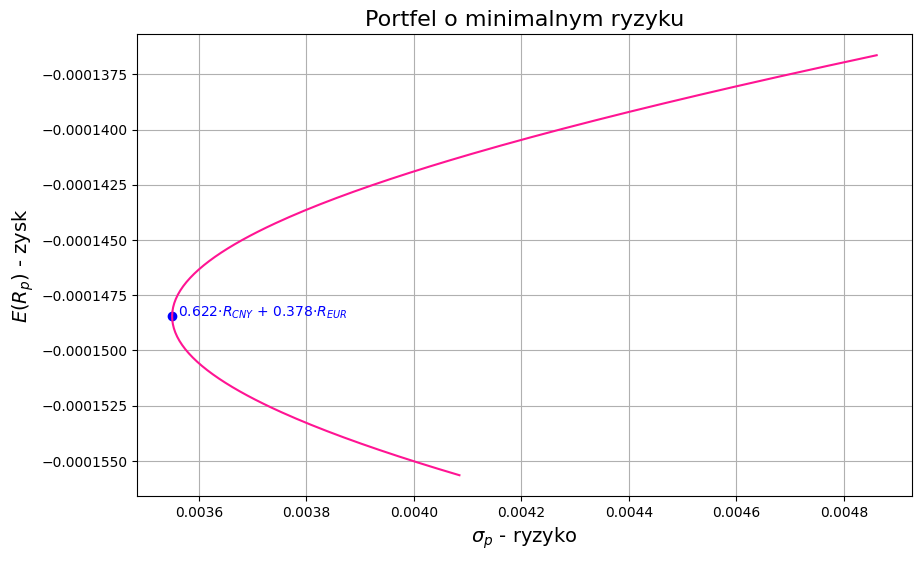

In [498]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_line, E_R_line, c='deeppink')
plt.scatter(min_sigma_p, min_E_R_p, c='b')
plt.title("Portfel o minimalnym ryzyku", fontsize=16)
plt.ylabel("$E(R_{p})$ - zysk", fontsize=14)
plt.xlabel("$\sigma_{p}$ - ryzyko", fontsize=14)
plt.grid(True)
plt.annotate(min_label, (min_sigma_p, min_E_R_p), textcoords="offset points", xytext=(65,0), ha='center', fontsize=10, color='b')
plt.show()

# **d) Portfel o minimalnym ryzyku przy ustalonej stopie zwrotu.**

In [499]:
chosen_E_R_p = -0.0001425

In [500]:
limit_w_a = (chosen_E_R_p - mean_eur) / (mean_cny - mean_eur)
limit_w_b = 1 - limit_w_a

In [501]:
print(f'w_a = {limit_w_a}\nw_b = {limit_w_b}')

w_a = 0.3084140828439077
w_b = 0.6915859171560923


In [502]:
chosen_E_R_p, chosen_sigma_p, chosen_label = calculate_E_sigma(np.array([limit_w_a]), np.array([limit_w_b]))

chosen_E_R_p = chosen_E_R_p[0]
chosen_sigma_p = chosen_sigma_p[0]
chosen_label = chosen_label[0]

In [503]:
display(Math(r'E(R_{p}) = ' + str(chosen_E_R_p)))
display(Math(r'\sigma_{p} = ' + str(chosen_sigma_p)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [504]:
chosen_label = str(round(limit_w_a, 2)) + '$\\cdot R_{CNY}$' + ' + ' + str(round(limit_w_b, 2)) + '$\\cdot R_{EUR}$'

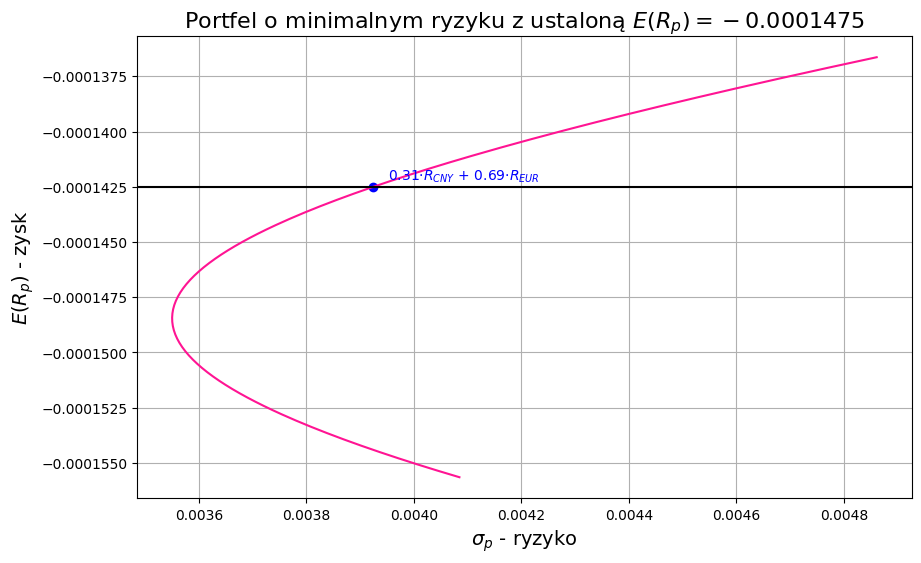

In [505]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_line, E_R_line, c='deeppink')
plt.scatter(chosen_sigma_p, chosen_E_R_p, c='b')
plt.axhline(chosen_E_R_p, c='black')
plt.title("Portfel o minimalnym ryzyku z ustaloną $E(R_{p}) = -0.0001475$", fontsize=16)
plt.ylabel("$E(R_{p})$ - zysk", fontsize=14)
plt.xlabel("$\sigma_{p}$ - ryzyko", fontsize=14)
plt.grid(True)
plt.annotate(chosen_label, (chosen_sigma_p, chosen_E_R_p), textcoords="offset points", xytext=(65,5), ha='center', fontsize=10, color='b')
plt.show()

# **e) Portfel rynkowy.**

In [506]:
# risk_free_rate = (2.16/100 
R_f=2.16**(1/365)-1
R_f

0.002112112913613462

In [507]:
2.16/500

0.00432

In [508]:
E_R_p_r, sigma_p_r, label_r = calculate_E_sigma(np.array([0]), np.array([1]))

E_R_p_r = E_R_p_r[0]
sigma_p_r = sigma_p_r[0]
label_r = label_r[0]

In [509]:
display(Math(r'E(R_{p}) = ' + str(E_R_p_r)))
display(Math(r'\sigma_{p} = ' + str(sigma_p_r)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

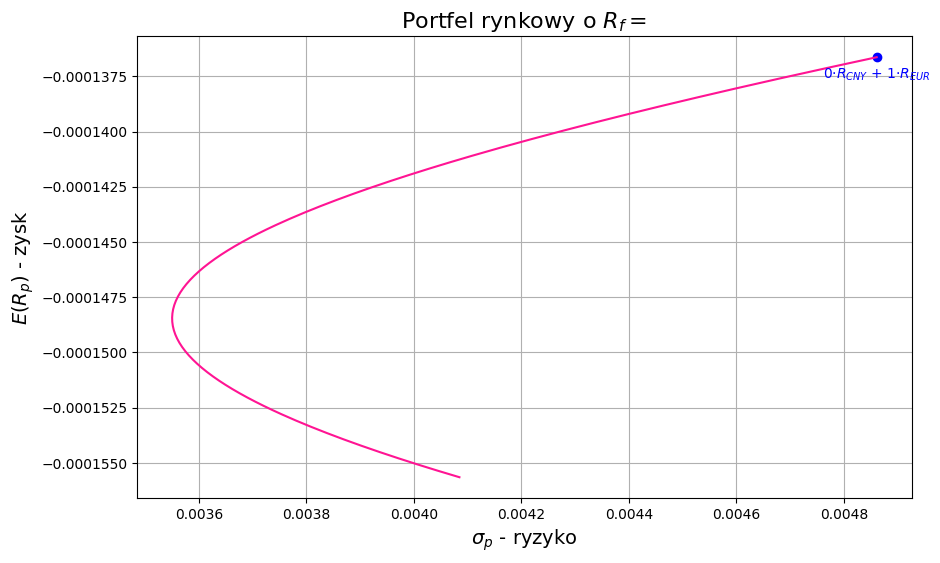

In [510]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_line, E_R_line, c='deeppink')
plt.scatter(sigma_p_r, E_R_p_r, c='b')
plt.title("Portfel rynkowy o $R_{f} = $", fontsize=16)
plt.ylabel("$E(R_{p})$ - zysk", fontsize=14)
plt.xlabel("$\sigma_{p}$ - ryzyko", fontsize=14)
plt.grid(True)
plt.annotate(label_r, (sigma_p_r, E_R_p_r), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=10, color='b')
plt.show()

# **Podsumowanie**

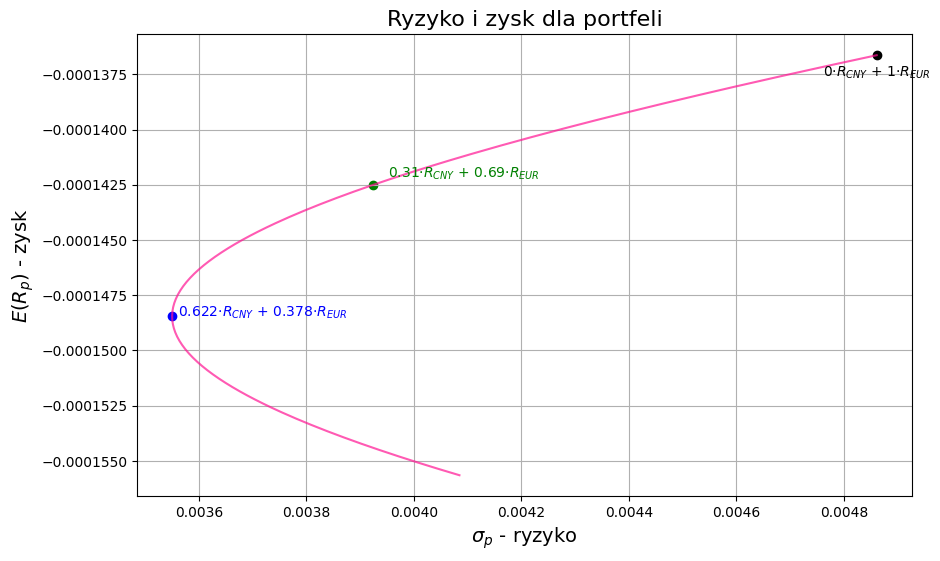

In [511]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_line, E_R_line, c='deeppink', alpha = 0.7)

plt.scatter(min_sigma_p, min_E_R_p, c='b')
plt.scatter(chosen_sigma_p, chosen_E_R_p, c='g')
plt.scatter(sigma_p_r, E_R_p_r, c='black')

# plt.axhline(chosen_E_R_p, c='black')

plt.title("Ryzyko i zysk dla portfeli", fontsize=16)
plt.ylabel("$E(R_{p})$ - zysk", fontsize=14)
plt.xlabel("$\sigma_{p}$ - ryzyko", fontsize=14)
plt.grid(True)

plt.annotate(min_label, (min_sigma_p, min_E_R_p), textcoords="offset points", xytext=(65,0), ha='center', fontsize=10, color='b')
plt.annotate(chosen_label, (chosen_sigma_p, chosen_E_R_p), textcoords="offset points", xytext=(65,5), ha='center', fontsize=10, color='g')
plt.annotate(label_r, (sigma_p_r, E_R_p_r), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=10, color='black')

plt.show()